# AGN spectra (3C 273)

- ### Luminosity and Flux

    $L_λ = F_λ*(4*π*D_L^2)$

    $D_L = Luminosity Distance$  
    $L_λ = Luminosity Density$  
    $F_λ = Flux Density$
   
- ### Mass of Black Hole
    
    $M_{BH}= f*(R_{BLR}*v_{BLR}^2)/G \ , \ Kilograms$  
     
    $log (R_{BLR}/lt_{day}) = 1.527 + 0.533*log(L_{λ5100}/10^{44})$  
    
    $lt_{day} = 2.59*10^{13} meter$  
    $v_{BLR} = FWHM*c/4863$  
    $G = 6.674*10^(-11)$  
    $f=3/4$  



# Table

In [1]:
from astropy.io.votable import parse_single_table
import numpy as np
import matplotlib.pyplot as plt

file = '3C_273_spectra.xml'
table = parse_single_table(file)

table

<Table length=1024>
    Frequency          Flux     
        Hz           W/m^2/Hz   
     float64         float64    
----------------- --------------
748582848000000.0 2.19118831e-29
747835909000000.0 2.19701496e-29
              ...            ...
369338991000000.0 2.08430818e-29
369152527000000.0  2.0875143e-29

# Plots

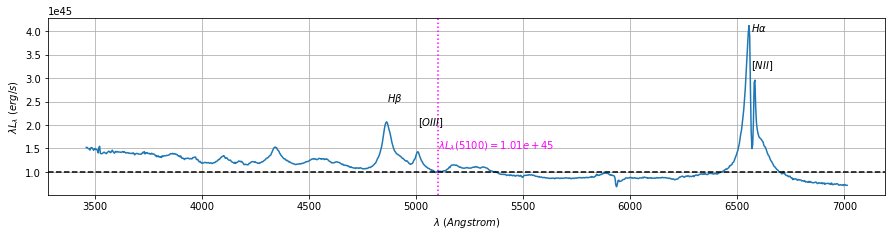

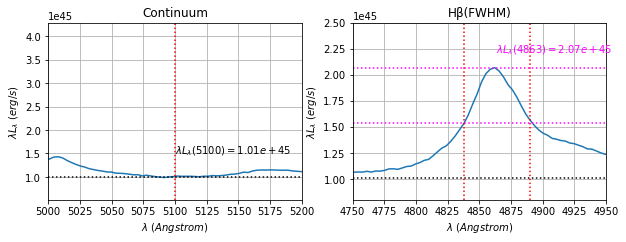

In [2]:
# -------- Constants & Data ----------------------------------------------------- #
z = 0.158
c = 29979245800 # cm/sec
Dl = 2.3467*(10**27) # cm
pi = 3.14

# retrieving frequency and flux from VOTable
freq_obs = table.array['Frequency'].data # Hz
flux_obs = table.array['Flux'].data # W/m^2/Hz
lambda_obs = c/(freq_obs) # cm


# -------- CALCULATION ---------------------------------------------------------- #

# Calculating source values of frequency and lambda
lambda_source = lambda_obs/(1+z) # cm
lambda_source_ang = (10**8)*lambda_source # Angstrom

flux_source = (1+z)*flux_obs # W/m^2/Hz
cgs_flux_factor = 10**7/(10**4)*(c/lambda_source) # erg/s/cm^2
flux_source_cgs = flux_source*cgs_flux_factor # erg/s/cm^2

# Luminosity Denisty
A = 4*pi*(Dl**2)
L= flux_source_cgs*A # erg/s

# -------- PLOT DATA ---------------------------------------------------------- #
# WHOLE SPECTRA 

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(4,1,1) 
plt.grid()
ax1.plot(lambda_source_ang, L)#np.transpose(L))
ax1.set_ylabel('$λL_λ \ (erg/s)$')
ax1.set_xlabel('$λ \ (Angstrom)$')

idx = np.argwhere(np.diff(np.sign(lambda_source_ang - 5100))).flatten()
ax1.annotate('$λL_λ(5100)={}$'.format(np.format_float_scientific(L[idx[0]], unique=False, precision=2)),
             xy=(5100, L[idx[0]]), xytext=(5100, L[idx[0]]+0.5e+45), color='magenta')
ax1.annotate(f'$Hβ$',
             xy=(4863,2.5e+45), xytext=(4863, 2.5e+45),)
ax1.annotate(f'$[O III]$',
             xy=(5007,2.0e+45), xytext=(5007, 2.0e+45),)
ax1.annotate(f'$Hα$',
             xy=(6562.8,4.0e+45), xytext=(6562.8, 4.0e+45),)
ax1.annotate(f'$[N II]$',
             xy=(6563,3.0e+45), xytext=(6563, 3.2e+45),)
ax1.axvline(x=5100, color='magenta', ls=':')
ax1.axhline(y=L[idx[0]], color='black', ls='--')
plt.show()

# Continuum 

fig1 = plt.figure(figsize=(10, 15))
ax2 = fig1.add_subplot(4,2,1) 
ax2.grid()
ax2.plot(lambda_source_ang, L)
ax2.set_xlim(5000, 5200)
ax2.set_title(f'Continuum')
ax2.axvline(x=5100, color='red', ls=':')
ax2.axhline(y=L[idx[0]], color='black', ls=':')
ax2.annotate('$λL_λ(5100)={}$'.format(np.format_float_scientific(L[idx[0]], unique=False, precision=2)), xy=(5100, L[idx[0]]), xytext=(5100, L[idx[0]]+0.5e+45),
            )
ax2.set_ylabel('$λL_λ \ (erg/s)$')
ax2.set_xlabel('$λ \ (Angstrom)$')
# Hβ 

ax3 = fig1.add_subplot(4,2,2) 
plt.grid()
ax3.plot(lambda_source_ang, L)
ax3.set_xlim(4750, 4950)
ax3.set_ylim(0.8e+45, 2.5e+45)
ax3.axhline(y=L[idx[0]], color='black', ls=':')
ax3.set_title(f'Hβ(FWHM)')
idx_max = np.argwhere(np.diff(np.sign(lambda_source_ang - 4863))).flatten()
#idx_min = np.argwhere(np.diff(np.sign(lambda_source_ang - 4750))).flatten()
idx_range = np.where(np.logical_and(lambda_source_ang>= 4750, lambda_source_ang<=4950))
L[idx_range].max()
ymax = L[idx_range].max()
ax3.axhline(y=ymax, color='magenta', ls=':')
xmax=4863
HMline = (ymax+L[idx[0]])/2

ax3.axhline(y=HMline, color='magenta', ls=':')
idx_FWHM = np.argwhere(np.diff(np.sign(L[idx_range] - HMline))).flatten()
lambda_Hb = lambda_source_ang[idx_range]
FWHM = lambda_Hb[idx_FWHM[1]] - lambda_Hb[idx_FWHM[0]]
ax3.axvline(x=lambda_Hb[idx_FWHM[0]], color='r', ls=':')
ax3.axvline(x=lambda_Hb[idx_FWHM[1]], color='r', ls=':')
#ax3.plot(lambda_source_ang, HMline)
ax3.annotate('$λL_λ(4863)={}$'.format(np.format_float_scientific(ymax, unique=False, precision=2)), xy=(xmax, ymax), xytext=(xmax, ymax+0.15e+45),
            color='magenta')
ax3.set_ylabel('$λL_λ \ (erg/s)$')
ax3.set_xlabel('$λ \ (Angstrom)$')

plt.show()
L_lambda_5100 = L[idx[0]] # erg/sec

# Calculations

In [3]:
# Mass of Black Hole
lt_day = 2.59*10**13 # m
R_BLR = lt_day*np.exp(1.527 + 0.533*np.log(L_lambda_5100/10**44)) # m
v_BLR = FWHM*299792458/4863 # m/sec
G = 6.674*10**(-11) # N-m^2/Kg^2

# N = Kg-m/s^2
# G = m^3/s^2 / Kg
# M_BH = (m * m^2/sec^2) / (m^3/s^2 / Kg)

f=3/4

M_BH = f*(R_BLR*v_BLR**2)/G # Kg
print(f'Mass of Black Hole : \n{np.round(M_BH/1.989e+36, 3)} Million Solar Mass\n {np.format_float_scientific(M_BH, unique=False, precision=2)} Kg')


Mass of Black Hole : 
23.768 Million Solar Mass
 4.73e+37 Kg
